In [2]:
import numpy as np

from scipy import special
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation
import seaborn as sns

from IPython.display import HTML

import pandas as pd


# import plotly.offline as pyo
# import plotly.graph_objects as go
# pyo.init_notebook_mode()

In [5]:
n_neurons = 100
max_time = 1000
n_paths = 10

In [6]:
output_df = pd.read_csv(f"./output/simulation_n_neurons_{n_neurons}_max_time_{max_time}_n_paths_{n_paths}_rolling_mean_summary")

In [7]:
time_arr = output_df["time_arr"]
overall_mean_mean_h = output_df["overall_mean_mean_h"]
overall_mean_std_h = output_df["overall_mean_std_h"]
overall_var_mean_h = output_df["overall_var_mean_h"]
overall_var_std_h = output_df["overall_var_std_h"]
lower_mean_h = output_df["lower_mean_h"]
upper_mean_h = output_df["upper_mean_h"]
union_lower_mean_h = output_df["union_lower_mean_h"]
union_upper_mean_h = output_df["union_upper_mean_h"]
lower_var_h = output_df["lower_var_h"]
upper_var_h = output_df["upper_var_h"]
union_lower_var_h = output_df["union_lower_var_h"]
union_upper_var_h = output_df["union_upper_var_h"]

1

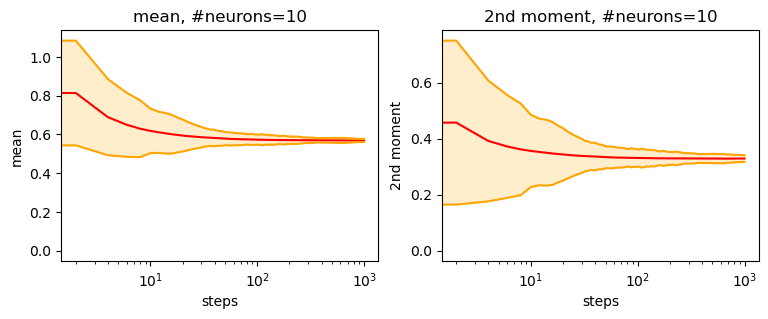

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(9,3))

ax[0].plot(time_arr, overall_mean_mean_h, color="red")
ax[0].plot(time_arr, overall_mean_mean_h - 2 * overall_mean_std_h, color="orange")
ax[0].plot(time_arr, overall_mean_mean_h + 2 * overall_mean_std_h, color="orange")
ax[0].fill_between(time_arr, 
                    overall_mean_mean_h - 2 * overall_mean_std_h, 
                    overall_mean_mean_h + 2 * overall_mean_std_h, 
                    color="orange", alpha=0.2)
ax[0].set_xscale("log")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("mean")
ax[0].set_title("mean, #neurons=10")

ax[1].plot(time_arr, overall_var_mean_h, color="red")
ax[1].plot(time_arr, overall_var_mean_h - 2 * overall_var_std_h, color="orange")
ax[1].plot(time_arr, overall_var_mean_h + 2 * overall_var_std_h, color="orange")
ax[1].fill_between(time_arr, 
                    overall_var_mean_h - 2 * overall_var_std_h, 
                    overall_var_mean_h + 2 * overall_var_std_h, 
                    color="orange", alpha=0.2)
ax[1].set_xscale("log")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("2nd moment")
ax[1].set_title("2nd moment, #neurons=10")
1

Further visualisation

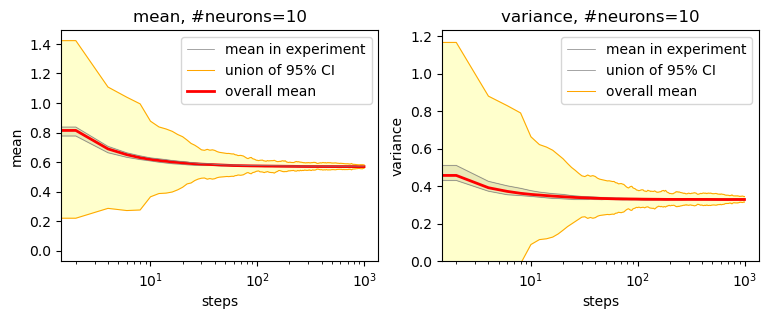

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(9,3))

ax[0].plot(time_arr, lower_mean_h, color="grey", linewidth=.5)
ax[0].plot(time_arr, union_lower_mean_h, color="orange", linewidth=.75)
ax[0].plot(time_arr, overall_mean_mean_h, color="red", linewidth=2)
ax[0].plot(time_arr, upper_mean_h, color="grey", linewidth=.5)
ax[0].plot(time_arr, union_upper_mean_h, color="orange", linewidth=.75)
ax[0].fill_between(time_arr, lower_mean_h, upper_mean_h, color="grey", alpha=0.2)
ax[0].fill_between(time_arr, union_lower_mean_h, union_upper_mean_h, color="yellow", alpha=0.2)
ax[0].set_xscale("log")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("mean")
ax[0].set_title("mean, #neurons=10")
ax[0].legend(["mean in experiment", "union of 95% CI", "overall mean"])

ax[1].plot(time_arr, lower_var_h, color="grey", linewidth=.5)
ax[1].plot(time_arr, upper_var_h, color="grey", linewidth=.5)
ax[1].plot(time_arr, union_lower_var_h, color="orange", linewidth=.75)
ax[1].plot(time_arr, union_upper_var_h, color="orange", linewidth=.75)
ax[1].plot(time_arr, overall_var_mean_h, color="red", linewidth=2)
ax[1].fill_between(time_arr, lower_var_h, upper_var_h, color="grey", alpha=0.2)
ax[1].fill_between(time_arr, union_lower_var_h, union_upper_var_h, color="yellow", alpha=0.2)
ax[1].set_ylim(0)
ax[1].set_xscale("log")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("variance")
ax[1].set_title("variance, #neurons=10")
ax[1].legend(["mean in experiment", "union of 95% CI", "overall mean"])

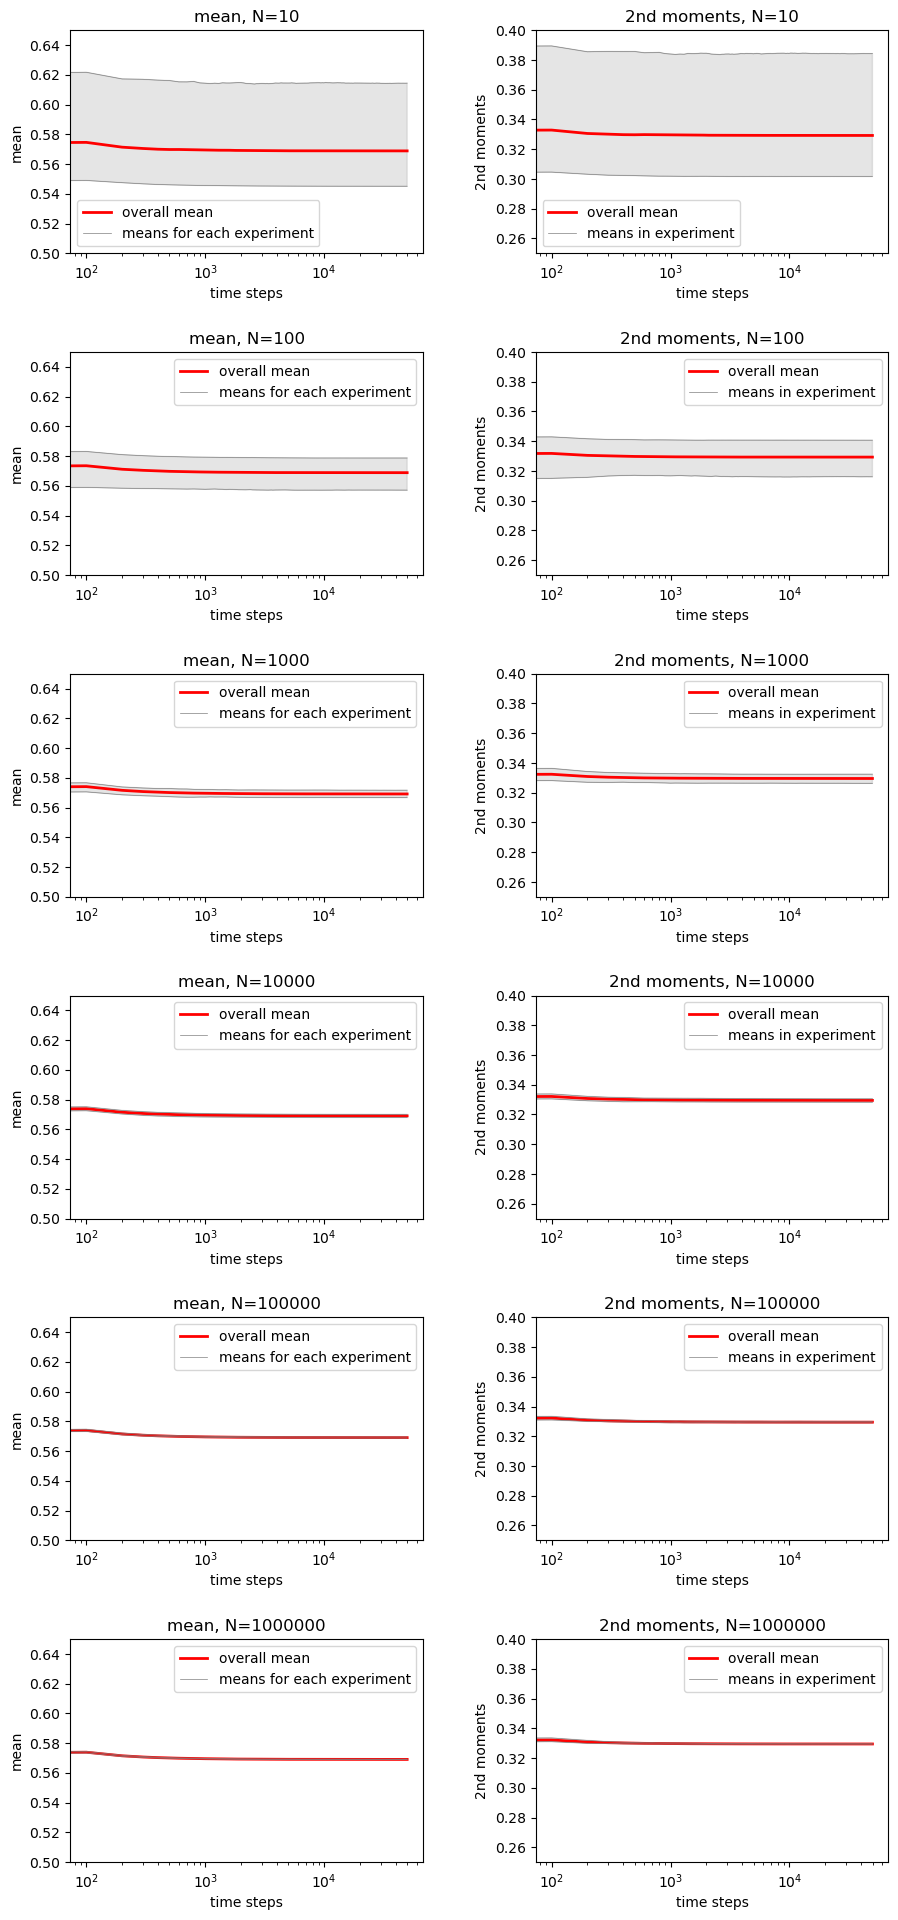

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
fig.tight_layout(pad=5)
n_neurons_arr = [10,100,1000,10000,100000,1000000]
max_time_arr = [50000] * 6
sample = 10

for i in range(6):
    output_df = pd.read_csv(f"./output/simulation_n_neurons_{n_neurons_arr[i]}_max_time_{max_time_arr[i]}_n_paths_100_rolling_mean_summary")

    time_arr = output_df["time_arr"]
    overall_mean_mean_h = output_df["overall_mean_mean_h"]
    overall_mean_std_h = output_df["overall_mean_std_h"]
    overall_var_mean_h = output_df["overall_var_mean_h"]
    overall_var_std_h = output_df["overall_var_std_h"]
    lower_mean_h = output_df["lower_mean_h"]
    upper_mean_h = output_df["upper_mean_h"]
    union_lower_mean_h = output_df["union_lower_mean_h"]
    union_upper_mean_h = output_df["union_upper_mean_h"]
    lower_var_h = output_df["lower_var_h"]
    upper_var_h = output_df["upper_var_h"]
    union_lower_var_h = output_df["union_lower_var_h"]
    union_upper_var_h = output_df["union_upper_var_h"]

    ax[i][0].plot(time_arr, overall_mean_mean_h, color="red", linewidth=2)
    ax[i][0].plot(time_arr, lower_mean_h, color="grey", linewidth=.5)
    # ax[i][0].plot(time_arr, union_lower_mean_h, color="orange", linewidth=.75)
    ax[i][0].plot(time_arr, upper_mean_h, color="grey", linewidth=.5)
    # ax[i][0].plot(time_arr, union_upper_mean_h, color="orange", linewidth=.75)
    ax[i][0].fill_between(time_arr, lower_mean_h, upper_mean_h, color="grey", alpha=0.2)
    # ax[i][0].fill_between(time_arr, union_lower_mean_h, union_upper_mean_h, color="yellow", alpha=0.2)
    ax[i][0].set_ylim([0.5, 0.65])
    ax[i][0].set_xscale("log")
    ax[i][0].set_xlabel("time steps")
    ax[i][0].set_ylabel("mean")
    ax[i][0].set_title(f"mean, N={n_neurons_arr[i]}")
    ax[i][0].legend(["overall mean", "means for each experiment"])

    ax[i][1].plot(time_arr, overall_var_mean_h, color="red", linewidth=2)
    ax[i][1].plot(time_arr, lower_var_h, color="grey", linewidth=.5)
    # ax[i][1].plot(time_arr, union_lower_var_h, color="orange", linewidth=.75)
    ax[i][1].plot(time_arr, upper_var_h, color="grey", linewidth=.5)
    # ax[i][1].plot(time_arr, union_upper_var_h, color="orange", linewidth=.75)
    ax[i][1].fill_between(time_arr, lower_var_h, upper_var_h, color="grey", alpha=0.2)
    # ax[i][1].fill_between(time_arr, union_lower_var_h, union_upper_var_h, color="yellow", alpha=0.2)
    ax[i][1].set_ylim([0.25, 0.4])
    ax[i][1].set_xscale("log")
    ax[i][1].set_xlabel("time steps")
    ax[i][1].set_ylabel("2nd moments")
    ax[i][1].set_title(f"2nd moments, N={n_neurons_arr[i]}")
    ax[i][1].legend(["overall mean", "means in experiment"])